In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = '../10-10-2024_combined_distances_vanilla_256_512.csv'
df = pd.read_csv(csv_file)

# Show the first few rows to confirm the data is loaded correctly
print(df.head())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                    pdb_file  shortest_ARG126-GLU52  shortest_ARG126-PHE59  \
0   model_2_ptm_r3_seed1.pdb                    5.0                   15.0   
1   model_3_ptm_r4_seed7.pdb                    4.4                   15.2   
2   model_4_ptm_r1_seed6.pdb                    5.0                   15.8   
3   model_5_ptm_r6_seed0.pdb                    3.5                   14.4   
4  model_5_ptm_r11_seed2.pdb                    3.5                   14.5   

   shortest_ARG126-GLU62  short

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distances_by_alias_split_violin(df, alias_dict):
    """
    Plots split violin plots for distances by alias, comparing two distance measurements per alias.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias_dict (dict): A dictionary where keys are aliases, and values are tuples of two column names for distances.

    Returns:
    None: Displays the split violin plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare the data for plotting
    plot_data = []
    labels = []
    distance_type = []

    # Loop through the dictionary
    for alias, (dist1_col, dist2_col) in alias_dict.items():
        # Check if both distance columns exist in the DataFrame
        if dist1_col not in df.columns:
            print(f"Error: Column '{dist1_col}' not found in the DataFrame.")
            continue
        if dist2_col not in df.columns:
            print(f"Error: Column '{dist2_col}' not found in the DataFrame.")
            continue
        
        # Extract the distances for both columns, dropping NaN values
        dist1 = df[dist1_col].dropna()
        dist2 = df[dist2_col].dropna()

        # Add the distances and labels to the plot data
        plot_data.extend(dist1)
        plot_data.extend(dist2)
        labels.extend([alias] * len(dist1))  # Repeat alias for both distances
        labels.extend([alias] * len(dist2))
        
        # Mark the distances with type ('Distance 1' and 'Distance 2')
        distance_type.extend(['Distance 1'] * len(dist1))
        distance_type.extend(['Distance 2'] * len(dist2))

    # Create a new DataFrame for the plotting data
    plot_df = pd.DataFrame({
        'Alias': labels,
        'Distance': plot_data,
        'Type': distance_type  # This will be used to split the violins
    })

    # Plot a split violin plot for the distances by alias
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Alias', y='Distance', hue='Type', data=plot_df, split=True, inner='box', cut=0)
    
    plt.title('VSD I')
    plt.xlabel('Alias')
    plt.ylabel('Distance (Å)')
    plt.grid(True)
    
    # Move the legend outside the plot (if needed)
    plt.legend(title="Distance Type", loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Example usage
alias_dict = {
    'Model 1 (ARG126)': ('shortest_ARG126-GLU52', 'shortest_ARG126-PHE59'),
    'Model 2 (ARG129)': ('shortest_ARG129-GLU52', 'shortest_ARG129-PHE59')
}

# Assuming df is already loaded with your CSV file
# plot_distances_by_alias_split_violin(df, alias_dict)


Error: Column 'shortest_ARG515-GLU479' not found in the DataFrame.


<Figure size 1200x600 with 0 Axes>

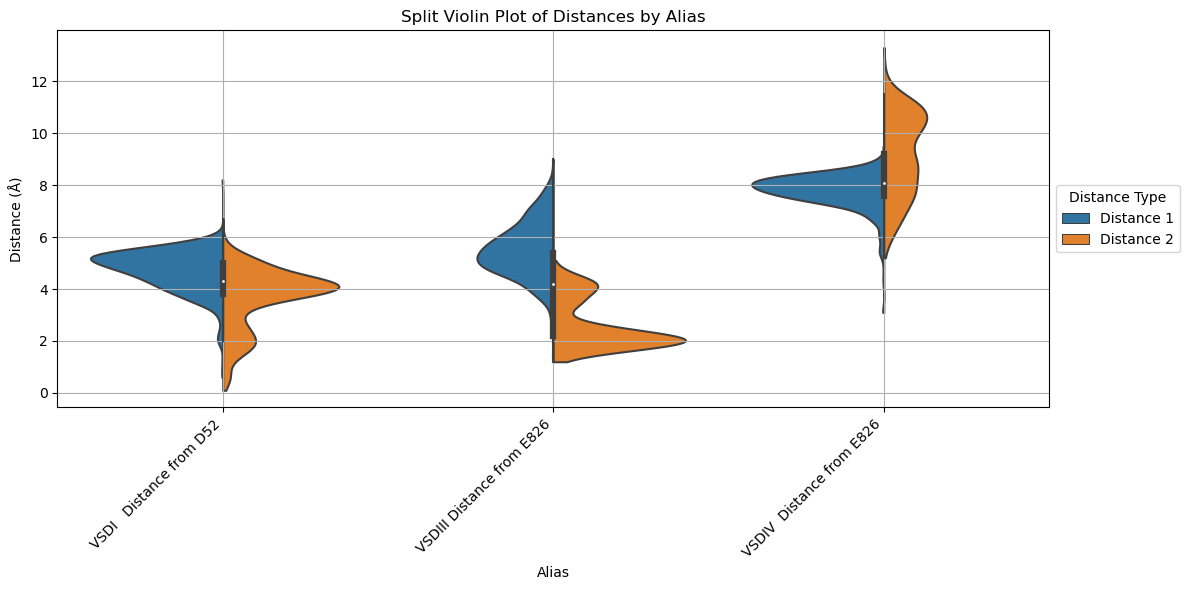

In [23]:
alias_dict = {
    'VSDI   Distance from D52': ('shortest_ARG126-GLU52', 'shortest_ARG129-GLU52'),
    'VSDII  Distance from D52': ('shortest_ARG515-GLU479', 'shortest_ARG521-GLU479'),#Calculate GLU479 for VSDII
    'VSDIII Distance from E826': ('shortest_ARG907-ASP826', 'shortest_ARG910-ASP826'),
    'VSDIV  Distance from E826': ('shortest_ARG1272-GLU1174', 'shortest_ARG1279-GLU1174'),
    
    #'Distance from D62': ('shortest_ARG132-GLU62', 'shortest_ARG135-GLU62')
}

# Assuming df is your DataFrame loaded from the CSV
plot_distances_by_alias_split_violin(df, alias_dict)
